# Unemployment Analysis with Python

In this project, we analyze unemployment data to understand the dynamics of joblessness over time, with a particular focus on the Covid-19 pandemic period. The unemployment rate is a key economic indicator that measures the percentage of the labor force that is unemployed and actively seeking employment.

## Dataset Overview

We worked with two datasets containing monthly unemployment data, which include information about regions, unemployment rates, estimated employed, and labor participation rates.

## Analysis Performed

1. **Data Cleaning and Preparation**
   - Loaded data from two CSV files into Pandas DataFrames.
   - Cleaned column names to ensure consistency.
   - Combined datasets into a single DataFrame for a comprehensive analysis.

2. **Time-Series Analysis**
   - Converted the 'Date' column to datetime objects for proper time series analysis.
   - Grouped the data by date and calculated the mean unemployment rate per month.
   - Created a time-series plot to visualize the trend of the unemployment rate over time.

3. **Descriptive Statistics**
   - Computed basic statistics such as mean, median, standard deviation, and maximum values to summarize the central tendency and variability of the unemployment rates.

## Insights Gained

- The analysis revealed variability in the unemployment rates over time, with a significant peak likely corresponding to the Covid-19 period.
- The overall mean unemployment rate across the dataset is approximately 11.18%, with a standard deviation of around 4.64%, indicating noticeable fluctuations.

This initial analysis sets the stage for further exploration, such as regional comparisons, correlation analysis, geospatial visualizations, and predictive modeling, to gain deeper insights into the unemployment trends and their potential causes.



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
# Assuming CSV files are in the current working directory and named as follows:
file_path_1 = 'Unemployment in India.csv'
file_path_2 = 'Unemployment_Rate_upto_11_2020.csv'

In [3]:
# Load the CSV files into DataFrames
data_1 = pd.read_csv(file_path_1)
data_2 = pd.read_csv(file_path_2)

In [4]:
# Clean the column names to remove leading/trailing spaces
data_1.columns = data_1.columns.str.strip()
data_2.columns = data_2.columns.str.strip()

In [5]:
# Columns to keep
common_columns = ['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
                  'Estimated Employed', 'Estimated Labour Participation Rate (%)']


In [6]:
# Select common columns and combine the datasets
combined_data = pd.concat([
    data_1[common_columns],
    data_2[common_columns]
])

In [7]:
# Convert the 'Date' column to datetime format
combined_data['Date'] = pd.to_datetime(combined_data['Date'], dayfirst=True)

# Sort and reset index
combined_data = combined_data.sort_values(by='Date').reset_index(drop=True)

# Set the date as the index for time series analysis
combined_data.set_index('Date', inplace=True)

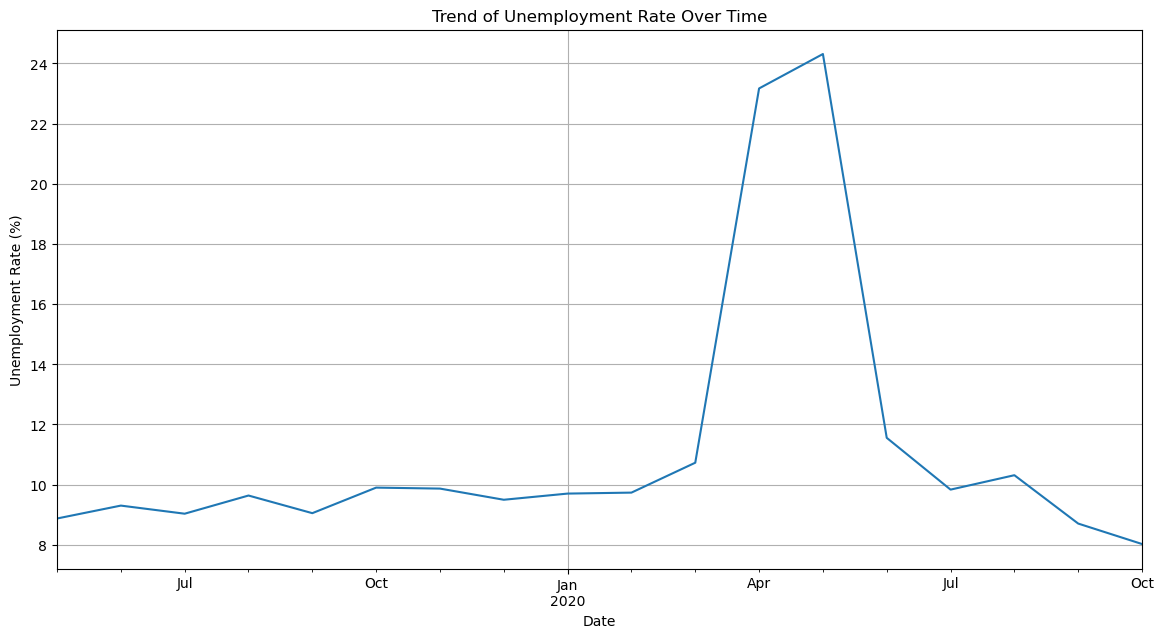

count    18.000000
mean     11.180394
std       4.639281
min       8.026296
25%       9.114631
50%       9.718671
75%      10.210227
max      24.310769
Name: Estimated Unemployment Rate (%), dtype: float64


In [8]:
# Group the data by Date and calculate the mean unemployment rate
unemployment_rate_over_time = combined_data['Estimated Unemployment Rate (%)'].resample('M').mean()

# Plotting the trend of Unemployment Rate over time
plt.figure(figsize=(14,7))
unemployment_rate_over_time.plot(title='Trend of Unemployment Rate Over Time')
plt.ylabel('Unemployment Rate (%)')
plt.xlabel('Date')
plt.grid(True)
plt.show()

# Calculate basic statistics for the unemployment rate
statistics = unemployment_rate_over_time.describe()
print(statistics)